In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [9]:
df = pd.read_csv("/home/rohan/Desktop/work/ML-projects1/Fuel-Consumption-Dataset/CO2 Emissions_Canada.csv")

In [11]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [12]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [14]:
cdf = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']]
cdf.head(9)

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


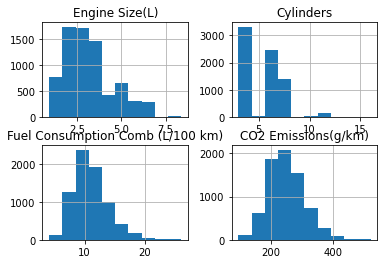

In [17]:
viz = cdf[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']]
viz.hist()
plt.show()

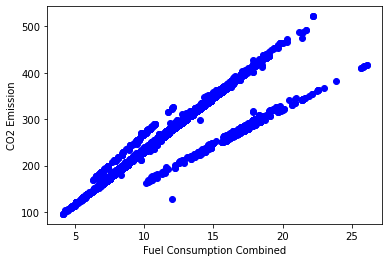

In [24]:
plt.scatter(cdf['Fuel Consumption Comb (L/100 km)'], cdf['CO2 Emissions(g/km)'], color="blue")
plt.xlabel("Fuel Consumption Combined")
plt.ylabel("CO2 Emission")
plt.show()

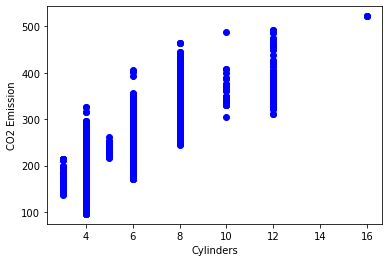

In [25]:
plt.scatter(cdf['Cylinders'], cdf['CO2 Emissions(g/km)'], color="blue")
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emission")
plt.show()

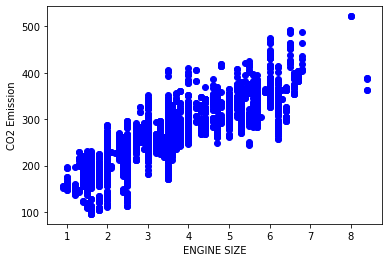

In [26]:
plt.scatter(cdf['Engine Size(L)'], cdf['CO2 Emissions(g/km)'], color="blue")
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 Emission")
plt.show()

In [29]:
rand_selector = np.random.rand(len(df)) < 0.8
train = cdf[rand_selector]
test = cdf[~rand_selector]

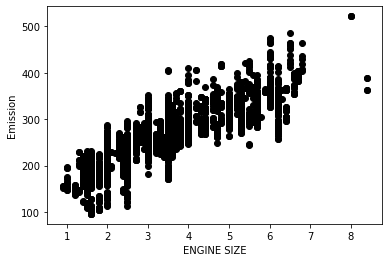

In [52]:
plt.scatter(train['Engine Size(L)'], train['CO2 Emissions(g/km)'], color='black')
plt.xlabel('ENGINE SIZE')
plt.ylabel('Emission')
plt.show()

In [53]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Engine Size(L)']])
train_y = np.asanyarray(train[['CO2 Emissions(g/km)']])
regr.fit(train_x, train_y)
# Printing the coefficients of linear regression model
print('Coefficients : ', regr.coef_)
print('Intercept : ', regr.intercept_)

Coefficients :  [[36.82236221]]
Intercept :  [134.41031743]


Coefficient and Intercept in SIMPLE LINEAR REGRESSION , are parameters of the fit line. With two variables known , sklearn is able to traverse and calculate them directly from the data.

PLOTTING THE FIT LINE : 

Text(0, 0.5, 'Emission')

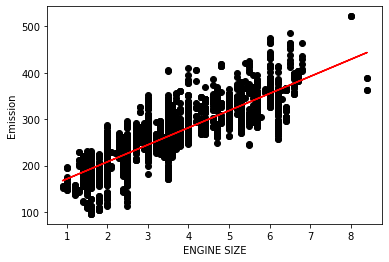

In [54]:
plt.scatter(train['Engine Size(L)'], train['CO2 Emissions(g/km)'], color='black')
plt.plot(train_x , regr.coef_[0][0]*train_x + regr.intercept_[0], 'r')
plt.xlabel('ENGINE SIZE')
plt.ylabel('Emission')


EVALUATION : COMPARING ACTUAL VALUES WITH TRAINED SET AND GET A SCORE BASED ON DIFFERENT EVALUATION METRICS. (Mean Absolute Error, IN THIS CASE)


In [55]:
from sklearn.metrics import r2_score


test_x = np.asanyarray(test[['Engine Size(L)']])
test_y = np.asanyarray(test[['CO2 Emissions(g/km)']])
test_yhat = regr.predict(test_x)

test_yhat[:10]

array([[263.28858518],
       [200.69056941],
       [307.47541983],
       [208.05504186],
       [244.87740407],
       [244.87740407],
       [281.69976628],
       [325.88660094],
       [289.06423873],
       [325.88660094]])

In [56]:
print('Mean absolute error : %.2f' % np.mean(np.absolute(test_yhat - test_y)))
print('Residual sum of squares (MSE) : %.2f' % np.mean((test_yhat - test_y) ** 2))
print("R2-SCORE : %.2f" % r2_score(test_yhat , test_y))

Mean absolute error : 23.70
Residual sum of squares (MSE) : 997.80
R2-SCORE : 0.60
